# Simulated DCA Demo

In [1]:
from hyppo.tools import SIMULATIONS
from matplotlib import cm
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
import pickle

import dist_cov as dc

In [2]:
np.random.seed(4)

# 1D Simulated Linear Independence Data
## Plot Dataset

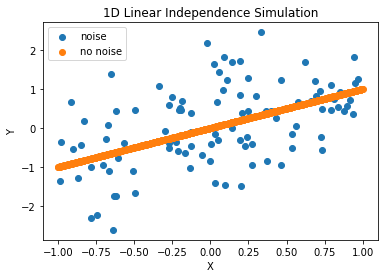

In [3]:
lin_sim = SIMULATIONS["linear"]
lin_x_n, lin_y_n = lin_sim(100, 1, noise=True)
lin_x, lin_y = lin_sim(1000, 1)
plt.scatter(lin_x_n, lin_y_n)
plt.scatter(lin_x, lin_y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("1D Linear Independence Simulation")
plt.legend(["noise", "no noise"]);

## Initialize Data

In [4]:
X, Y = lin_sim(10, 1, noise=True)
D_X = dc.dist_mat(X)
D_Y = dc.dist_mat(Y)
R_X = dc.re_centered_dist(D_X)
R_Y = dc.re_centered_dist(D_Y)
u = np.random.rand(X.shape[1])
u_normalized_norm = LA.norm(dc.normalize_u(u))
print(f"X shape: {X.shape}")
print(f"Y shape: {Y.shape}")
print(f"u: {u}")
print(f"u norm: {u_normalized_norm}")
D_u = dc.dist_mat_u(u, X)
R_X_u = dc.re_centered_dist(D_u)

X shape: (10, 1)
Y shape: (10, 1)
u: [0.01399029]
u norm: 1.0


/home/db202/anaconda3/envs/hyppo/lib/python3.9/site-packages/numba/core/typed_passes.py:331: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "dist_cov.py", line 131:
@njit(parallel=True)
def dist_mat_u(u, X):
^

  warnings.warn(errors.NumbaPerformanceWarning(msg,


## Test Function Dimension Alignment

In [5]:
du = dc.dist_cov_sq_grad(u, X, R_Y)
print(f"dvdu: {du}")
v = dc.dist_cov_sq(R_X, R_Y)
print(f"v^2: {v}")

dvdu: [0.713382]
[[0.00000000e+00 4.42212085e-01 9.99553981e-02 4.54236832e-01
  1.93102780e-01 6.04593717e-01 3.70328610e-01 5.24033256e-01
  7.57567466e-02 9.01989814e-03]
 [4.42212085e-01 0.00000000e+00 7.03385117e-01 3.21387222e-01
  6.59835341e-01 2.48232786e-05 1.98051865e+00 2.21023335e+00
  9.73699402e-01 7.78893639e-01]
 [9.99553981e-02 7.03385117e-01 0.00000000e+00 3.34887164e-01
  9.08440110e-01 8.30395126e-01 3.21207583e-01 5.77563806e-01
  3.80405635e-01 3.52503436e-02]
 [4.54236832e-01 3.21387222e-01 3.34887164e-01 0.00000000e+00
  1.49255151e+00 2.31354628e-01 1.64790231e+00 3.42552562e+00
  1.41056131e+00 6.32620682e-01]
 [1.93102780e-01 6.59835341e-01 9.08440110e-01 1.49255151e+00
  0.00000000e+00 1.02863790e+00 1.04531959e+00 3.89481040e-01
  1.09738690e-01 5.80438806e-01]
 [6.04593717e-01 2.48232786e-05 8.30395126e-01 2.31354628e-01
  1.02863790e+00 0.00000000e+00 2.20285327e+00 2.74547010e+00
  1.26953160e+00 9.45970552e-01]
 [3.70328610e-01 1.98051865e+00 3.2120758

## Optimize $u$

In [6]:
R_X_u

array([[ 0.00000000e+00,  7.29270702e-03,  1.59262287e-03,
         3.24409392e-03, -9.27687691e-03,  7.29382249e-03,
        -2.68716949e-03, -1.67532352e-02, -5.99616798e-03,
        -2.08824357e-04],
       [-7.29270702e-03,  0.00000000e+00, -5.70008415e-03,
        -4.04861311e-03, -1.65695839e-02,  1.11547122e-06,
        -9.97987651e-03, -2.40459423e-02, -1.32888750e-02,
        -7.50153138e-03],
       [-1.59262287e-03,  5.70008415e-03,  0.00000000e+00,
         1.65147105e-03, -1.08694998e-02,  5.70119962e-03,
        -4.27979236e-03, -1.83458581e-02, -7.58879085e-03,
        -1.80144722e-03],
       [-3.24409392e-03,  4.04861311e-03, -1.65147105e-03,
         0.00000000e+00, -1.25209708e-02,  4.04972858e-03,
        -5.93126340e-03, -1.99973292e-02, -9.24026189e-03,
        -3.45291827e-03],
       [ 9.27687691e-03,  1.65695839e-02,  1.08694998e-02,
         1.25209708e-02,  0.00000000e+00,  1.65706994e-02,
         6.58970742e-03, -7.47635833e-03,  3.28070893e-03,
         9.

In [7]:
R_Y

array([[0.        , 0.84833722, 0.87805149, 1.95891507, 0.29121478,
        1.15967186, 1.92805263, 0.4376096 , 0.17675602, 0.60429244],
       [0.84833722, 0.        , 1.72638871, 1.11057785, 0.55712244,
        0.31133465, 2.77638985, 1.28594682, 1.02509323, 1.45262966],
       [0.87805149, 1.72638871, 0.        , 2.83696656, 1.16926627,
        2.03772336, 1.05000114, 0.44044189, 0.70129548, 0.27375905],
       [1.95891507, 1.11057785, 2.83696656, 0.        , 1.66770029,
        0.79924321, 3.8869677 , 2.39652467, 2.13567109, 2.56320751],
       [0.29121478, 0.55712244, 1.16926627, 1.66770029, 0.        ,
        0.86845708, 2.21926741, 0.72882438, 0.4679708 , 0.89550722],
       [1.15967186, 0.31133465, 2.03772336, 0.79924321, 0.86845708,
        0.        , 3.0877245 , 1.59728146, 1.33642788, 1.7639643 ],
       [1.92805263, 2.77638985, 1.05000114, 3.8869677 , 2.21926741,
        3.0877245 , 0.        , 1.49044303, 1.75129662, 1.32376019],
       [0.4376096 , 1.28594682, 0.4404418

In [8]:
v_u = dc.dist_cov_sq(R_Y, R_X_u)
print(f"v^2_u: {v_u}")
u_opt, v_opt = dc.optim_u_gd(u, X, R_Y, 1e-1, 1e-7)
print(f"u opt: {u_opt}")
print(f"v^2_u_opt: {v_opt}")

[[ 0.00000000e+00  6.18667478e-03  1.39840489e-03  6.35490446e-03
  -2.70156367e-03  8.45844072e-03 -5.18100421e-03 -7.33137660e-03
  -1.05985876e-03 -1.26190980e-04]
 [-6.18667478e-03  0.00000000e+00 -9.84056093e-03 -4.49630005e-03
  -9.23128698e-03  3.47284837e-07 -2.77080278e-02 -3.09218030e-02
  -1.36223358e-02 -1.08969470e-02]
 [-1.39840489e-03  9.84056093e-03  0.00000000e+00  4.68516815e-03
  -1.27093395e-02  1.16174676e-02 -4.49378685e-03 -8.08028444e-03
  -5.32198470e-03 -4.93162487e-04]
 [-6.35490446e-03  4.49630005e-03 -4.68516815e-03  0.00000000e+00
  -2.08812267e-02  3.23671806e-03 -2.30546293e-02 -4.79240927e-02
  -1.97341602e-02 -8.85054605e-03]
 [ 2.70156367e-03  9.23128698e-03  1.27093395e-02  2.08812267e-02
   0.00000000e+00  1.43909413e-02  1.46243229e-02 -5.44895224e-03
   1.53527597e-03  8.12050653e-03]
 [-8.45844072e-03 -3.47284837e-07 -1.16174676e-02 -3.23671806e-03
  -1.43909413e-02  0.00000000e+00 -3.08185534e-02 -3.84099196e-02
  -1.77611138e-02 -1.32344012e-02

## Plot Gradient Ascent

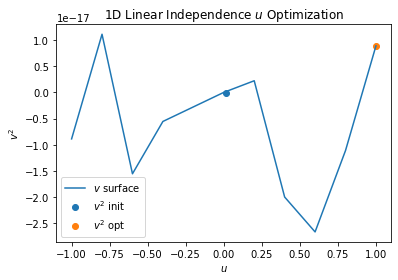

In [7]:
u_plt = np.expand_dims(np.linspace(-1, 1, 11), 1)
v_u_plt = np.zeros_like(u_plt)
for i in range(u_plt.shape[0]):
    D_u_i = dc.dist_mat_u(u_plt[i], X)
    R_X_u_i = dc.re_centered_dist(D_u_i)
    v_u_i = dc.dist_cov_sq(R_Y, R_X_u_i)
    v_u_plt[i] = v_u_i
plt.plot(u_plt, v_u_plt)
plt.scatter([u], [v_u])
plt.scatter([u_opt], [v_opt])
plt.xlabel(r"$u$")
plt.ylabel(r"$v^2$")
plt.title(r"1D Linear Independence $u$ Optimization")
plt.legend([r'$v$ surface', r'$v^2$ init', r'$v^2$ opt']);

# 2D Simulated Linear Independence Data
## Plot Dataset

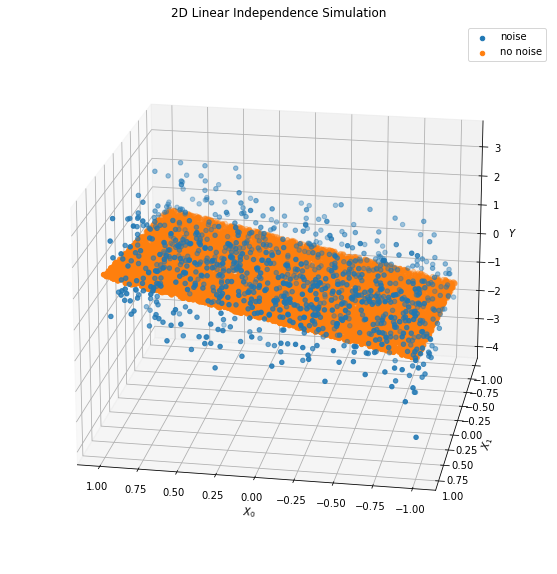

In [8]:
lin_sim = SIMULATIONS["linear"]
lin_x_n, lin_y_n = lin_sim(1000, 2, noise=True)
lin_x, lin_y = lin_sim(10000, 2)

lin_x_1_n = lin_x_n[:, 0]
lin_x_2_n = lin_x_n[:, 1]
lin_x_1 = lin_x[:, 0]
lin_x_2 = lin_x[:, 1]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(lin_x_1_n, lin_x_2_n, lin_y_n)
ax.scatter(lin_x_1, lin_x_2, lin_y)
ax.set_xlabel(r"$X_0$")
ax.set_ylabel(r"$X_1$")
ax.set_zlabel(r"$Y$")
plt.title("2D Linear Independence Simulation")
plt.legend(["noise", "no noise"])
ax.view_init(elev=20, azim=100);

## Initialize Data

In [9]:
X, Y = lin_sim(10, 2, noise=True)
D_X = dc.dist_mat(X)
D_Y = dc.dist_mat(Y)
R_X = dc.re_centered_dist(D_X)
R_Y = dc.re_centered_dist(D_Y)
u = np.random.rand(X.shape[1])
u = dc.normalize_u(u)
u_norm = LA.norm(u)
print(f"X shape: {X.shape}")
print(f"Y shape: {Y.shape}")
print(f"u: {u}")
print(f"u norm: {u_norm}")
D_u = dc.dist_mat_u(u, X)
R_X_u = dc.re_centered_dist(D_u)

X shape: (10, 2)
Y shape: (10, 1)
u: [0.52277513 0.85247062]
u norm: 1.0


## Test Function Dimension Alignment

In [10]:
du = dc.dist_cov_sq_grad(u, X, R_Y)
print(f"dvdu: {du}")
v = dc.dist_cov_sq(R_X, R_Y)
print(f"v^2: {v}")

dvdu: [0.92996764 0.64518626]
v^2: 1.5870951604567491


## Optimize $u$

In [11]:
v_u = dc.dist_cov_sq(R_Y, R_X_u)
print(f"v^2_u: {v_u}")
u_opt, v_opt = dc.optim_u_gd(u, X, R_Y, 1e-2, 1e-14)
print(f"u opt: {u_opt}")
print(f"v^2_u_opt: {v_opt}")

v^2_u: 8.881784197001253e-18
u opt: [0.52661282 0.85010525]
v^2_u_opt: -3.552713678800501e-17


## Plot Gradient Ascent

In [12]:
surf_res = 1e-1
X_surf = np.arange(-1, 1, surf_res)
Y_surf = np.arange(-1, 1, surf_res)
X_surf, Y_surf = np.meshgrid(X_surf, Y_surf)
v_u_plt = np.zeros_like(X_surf)
for i in range(X_surf.shape[0]):
    for j in range(X_surf.shape[1]):
        R_X_u_i = dc.re_centered_dist_u(np.array([X_surf[i, j], Y_surf[i, j]]), X)
        v_u_i = dc.dist_cov_sq(R_Y, R_X_u_i)
        v_u_plt[i, j] = v_u_i

AttributeError: module 'dist_cov' has no attribute 're_centered_dist_u'

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))
surf = ax.plot_surface(X_surf, Y_surf, v_u_plt, cmap=cm.coolwarm, linewidth=0, antialiased=True, alpha=.7)
ax.scatter([u[0]], [u[1]], [v_u])
ax.scatter([u_opt[0]], [u_opt[1]], [v_opt])
ax.set_xlabel(r"$u_0$")
ax.set_ylabel(r"$u_1$")
ax.set_zlabel(r"$v^2$")
ax.set_title(r"2D Linear Independence $u$ Optimization")
init_proxy = Line2D([0], [0], linestyle="none", c='blue', marker='o')
opt_proxy = Line2D([0], [0], linestyle="none", c='orange', marker='o')
ax.legend([init_proxy, opt_proxy], [r"$v^2$ init", r"$v^2$ opt"], numpoints=1)
fig.colorbar(surf, shrink=0.5, aspect=10)
ax.view_init(elev=40, azim=180);

# nD Simulated Linear Independence Data
## Initialize Data

In [ ]:
lin_sim = SIMULATIONS["linear"]
X, Y = lin_sim(100, 10, noise=True)
D_X = dc.dist_mat(X)
D_Y = dc.dist_mat(Y)
R_X = dc.re_centered_dist(D_X)
R_Y = dc.re_centered_dist(D_Y)
u = np.random.rand(X.shape[1])
u = dc.normalize_u(u)
u_norm = LA.norm(u)
print(f"X shape: {X.shape}")
print(f"Y shape: {Y.shape}")
print(f"u: {u}")
print(f"u norm: {u_norm}")
R_X_u = dc.re_centered_dist_u(u, X)

## Test Function Dimension Alignment

In [ ]:
du = dc.dist_cov_sq_grad(u, X, R_Y)
print(f"dvdu: {du}")
v = dc.dist_cov_sq(R_X, R_Y)
print(f"v^2: {v}")

## Optimize $u$

In [ ]:
v_u = dc.dist_cov_sq(R_Y, R_X_u)
print(f"v^2_u: {v_u}")
u_opt, v_opt = dc.optim_u_gd_stochastic(u, X, R_Y, 1e-1, 1e-10)
print(f"u opt: {u_opt}")
print(f"v^2_u_opt: {v_opt}")

## DCA

In [ ]:
print(f"X shape: {X.shape}")
print(f"X:\n{X[:5]}")
U, v_dca = dc.dca(X, Y, K=3, lr=1e-1, epsilon=1e-10)
print(f"U shape: {U.shape}")
print(f"U:\n{U}")
print(f"v shape: {v_dca.shape}")
print(f"v: {v_dca}")
X_reduced = X @ U
print(f"X_reduced shape: {X_reduced.shape}")
print(f"X_reduced:\n{X_reduced[:5]}")

# Projection

In [ ]:
k_pt = 1
X_pt = np.array([5, 1])
X_pt = X_pt / LA.norm(X_pt)
U_pt = np.array([1, 2])
U_pt = U_pt / LA.norm(U_pt)
U_pt = np.expand_dims(U_pt, 0)
q_pt = LA.qr(U_pt[:, :k_pt])
X_proj_pt = dc.proj_U(X_pt, U_pt, k_pt)
print(q_pt)

In [ ]:
x_range_pt = np.linspace(0, 1, 11)
plt.plot(X_pt[0] * x_range_pt, X_pt[1] * x_range_pt)
plt.plot(U_pt[:, 0] * x_range_pt, U_pt[:, 1] * x_range_pt)
plt.plot(q_pt[0] * x_range_pt, q_pt[1] * x_range_pt)
plt.plot(X_proj_pt[0] * x_range_pt, X_proj_pt[1] * x_range_pt)
plt.legend(["X", "U", "q", "X proj"]);

# Replicate Figure 2 from Cowley

In [ ]:
def unit_vec(v):
    return v / LA.norm(v)

def vec_angle(v0, v1):
    """
    Radians
    """
    u0 = unit_vec(v0)
    u1 = unit_vec(v1)
    return np.arccos(np.clip(np.dot(u0, u1), -1., 1.))

def beta_angle(beta_hat, beta):
    """
    Mean of all beta_i vectors (P x 1)
    """
    angle = 0
    b = beta_hat.shape[1]
    for i in range(b):
        v0 = beta_hat[:, i]
        v1 = beta[:, i]
        angle += vec_angle(v0, v1)
    return angle / (N * b)

def generate_data(N, P, b, f):
    """
    N: number of samples
    P: number of features
    b: number of dimensions identified from dimensionality reduction
    f: degree of nonlinearity
    returns
        X: (P x N): (feature x sample)
        beta: (P x b), beta_i: (P x 1)
        Y: (b x N)
    """
    X = np.random.normal(size=(P, N))
    beta = np.random.normal(size=(P, b))
    beta, _ = LA.qr(beta)
    alpha = 8 * np.sqrt(50) * LA.norm(X, ord=np.inf) # normalization constant
    Y = np.zeros((b, N))
    for i in range(N):
        Y[:, i] = np.sin(2 * np.pi / alpha * f * beta.T @ X[:, i]) # (b x P) @ (P x 1) = (b x 1)
    return X, beta, Y

In [ ]:
N = 100 # sample
P = 5 # feature
b = 2 # number of dimensions identified from dimensionality reduction
trial_ct = 10
f_range = [1] + [i for i in range(10, 130, 10)] # degree of nonlinearity
beta_angles = np.zeros((trial_ct, len(f_range)))
for i in range(trial_ct):
    print(f"trial: {i}")
    for j, f in enumerate(f_range):
        X, beta, Y = generate_data(N, P, b, f)
        beta_hat, v_hat = dc.dca(X.T, Y.T, K=b, lr=1e-1, epsilon=1e-10)
        angle = beta_angle(beta_hat, beta)
        print(f"f: {f}")
        print(f"beta angle: {np.rad2deg(angle)} deg")
        beta_angles[i, j] = angle
with open("dca_betas.pickle", 'wb') as wf:
    pickle.dump(beta_angles, wf)

In [ ]:
with open("dca_betas.pickle", 'rb') as rf:
    beta_angles = pickle.load(rf)
plt.plot(f_range, np.mean(np.rad2deg(beta_angles), axis=0))
plt.title("Mean Error Angle as a Function of Nonlinearity")
plt.xlabel("f")
plt.ylabel("angle: beta_hat, beta (deg)")
plt.legend(["DCA"]);